## Hyper Parameter Optimization using ScikitLearn metric
- in this notebook we will be using 'roc_auc'

In [1]:
# import libraries

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

In [2]:
# if you want more information about the dataset for this demo:

# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

# dataset information: UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
    
# in short, classification problem, trying to predict whether the tumor
# is malignant or benign

# load dataset
load_breast_cancer(return_X_y=False)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# percentage of benign (0) and malign tumors (1)

y.value_counts() / len(y)

0    0.627417
1    0.372583
dtype: float64

## Confusion matrix

We will use the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
) function from sklearn to return the false positive, false negatives, true positives and true negatives, to construct the false negative rate.


TN | FP

FN | TP

## Using ScikitLearn metric roc_auc

In [5]:
# set up the estimator
rf = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0,n_jobs=2)

In [6]:
# perform GridSearchCV

# set up param_grid

param_grid = dict(
    n_estimators = [10,50, 100, 200, 300],
    max_depth = [1,2,3,4]
)

# set the GridSearch
# scoring method is used as 'roc_auc'
clf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', n_jobs=2, cv = 3)

search = clf.fit(X,y)

In [7]:
# best params
search.best_params_

{'max_depth': 4, 'n_estimators': 200}

In [8]:
search.best_score_

0.9904136302408287

In [9]:
# get the cv results
search.cv_results_

{'mean_fit_time': array([0.0243326 , 0.07333263, 0.13299974, 0.25599964, 0.37599953,
        0.0183324 , 0.06866781, 0.13033326, 0.25500226, 0.3873322 ,
        0.01866508, 0.07133373, 0.13466732, 0.26366568, 0.39499982,
        0.01899886, 0.07433311, 0.13866687, 0.28533276, 0.40633186]),
 'std_fit_time': array([4.70808436e-04, 1.24717561e-03, 8.15271633e-04, 8.16048190e-04,
        2.94454379e-03, 1.24715049e-03, 9.42628497e-04, 4.72494310e-04,
        2.44892287e-03, 4.02691652e-03, 9.44764077e-04, 1.88609959e-03,
        2.05688696e-03, 2.35600883e-03, 2.94411185e-03, 8.48537942e-07,
        2.05745448e-03, 9.42066861e-04, 2.05549415e-03, 7.40798085e-03]),
 'mean_score_time': array([0.01033314, 0.01866603, 0.02733382, 0.0430007 , 0.06166855,
        0.00733336, 0.01466632, 0.02466742, 0.04433306, 0.0646673 ,
        0.00733423, 0.01499955, 0.02533277, 0.04466756, 0.06600165,
        0.00700235, 0.01499963, 0.02499922, 0.04633355, 0.0636673 ]),
 'std_score_time': array([4.71482786e-

In [10]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results

,params,mean_test_score,std_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.978621,0.010969
1,"{'max_depth': 1, 'n_estimators': 50}",0.981881,0.007909
2,"{'max_depth': 1, 'n_estimators': 100}",0.982136,0.006525
3,"{'max_depth': 1, 'n_estimators': 200}",0.982149,0.005422
4,"{'max_depth': 1, 'n_estimators': 300}",0.982976,0.006207
5,"{'max_depth': 2, 'n_estimators': 10}",0.985965,0.007461
6,"{'max_depth': 2, 'n_estimators': 50}",0.988145,0.003591
7,"{'max_depth': 2, 'n_estimators': 100}",0.987366,0.003287
8,"{'max_depth': 2, 'n_estimators': 200}",0.986887,0.003335
9,"{'max_depth': 2, 'n_estimators': 300}",0.986767,0.003680


In [11]:
results.sort_values(by='mean_test_score', ascending=False, inplace = True)
results

,params,mean_test_score,std_test_score
18,"{'max_depth': 4, 'n_estimators': 200}",0.990414,0.001677
19,"{'max_depth': 4, 'n_estimators': 300}",0.990295,0.001758
17,"{'max_depth': 4, 'n_estimators': 100}",0.990179,0.001600
16,"{'max_depth': 4, 'n_estimators': 50}",0.989594,0.002795
14,"{'max_depth': 3, 'n_estimators': 300}",0.989067,0.002317
13,"{'max_depth': 3, 'n_estimators': 200}",0.988869,0.002342
12,"{'max_depth': 3, 'n_estimators': 100}",0.988832,0.001950
11,"{'max_depth': 3, 'n_estimators': 50}",0.988724,0.003633
6,"{'max_depth': 2, 'n_estimators': 50}",0.988145,0.003591
10,"{'max_depth': 3, 'n_estimators': 10}",0.987698,0.006966


In [12]:
results.reset_index(drop=True, inplace = True)
results

,params,mean_test_score,std_test_score
0,"{'max_depth': 4, 'n_estimators': 200}",0.990414,0.001677
1,"{'max_depth': 4, 'n_estimators': 300}",0.990295,0.001758
2,"{'max_depth': 4, 'n_estimators': 100}",0.990179,0.001600
3,"{'max_depth': 4, 'n_estimators': 50}",0.989594,0.002795
4,"{'max_depth': 3, 'n_estimators': 300}",0.989067,0.002317
5,"{'max_depth': 3, 'n_estimators': 200}",0.988869,0.002342
6,"{'max_depth': 3, 'n_estimators': 100}",0.988832,0.001950
7,"{'max_depth': 3, 'n_estimators': 50}",0.988724,0.003633
8,"{'max_depth': 2, 'n_estimators': 50}",0.988145,0.003591
9,"{'max_depth': 3, 'n_estimators': 10}",0.987698,0.006966


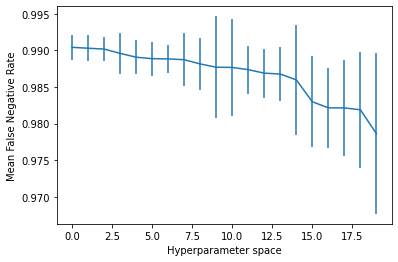

In [13]:
#plotting the mean test score
results['mean_test_score'].plot(yerr = (results['std_test_score'],results['std_test_score']))
plt.ylabel('Mean False Negative Rate')
plt.xlabel('Hyperparameter space')
plt.show();

https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules